In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
mu = 100
sigma = 10

In [73]:
population = np.random.normal(mu, sigma, 10000).round(2)

In [74]:
population

array([101.88,  98.65,  99.89, ..., 116.35, 108.23,  99.45])

In [75]:
mu = population.mean()

100.02189200000001

In [76]:
sigma = population.std()

9.955269920014022

In [130]:
sample_size = 5

In [131]:
se = sigma / np.sqrt(sample_size)

In [132]:
sample = np.random.choice(population, sample_size, replace=False)

In [133]:
sample.mean()

106.96400000000001

### Расчитаем z значение

In [134]:
n = 10000
z_score = [(np.random.choice(population, sample_size, replace=False).mean() - mu) / se  for _ in range(n)]
z_score[:10]

[-1.4306362920043645,
 -1.9628204706493133,
 -0.6520374222389379,
 3.1776437161565094e-15,
 -0.6913922186429347,
 -1.0473742406609008,
 -2.5781863780572576,
 -0.3345157694339706,
 0.5286064698809481,
 0.7267220926874316]

<Axes: ylabel='Count'>

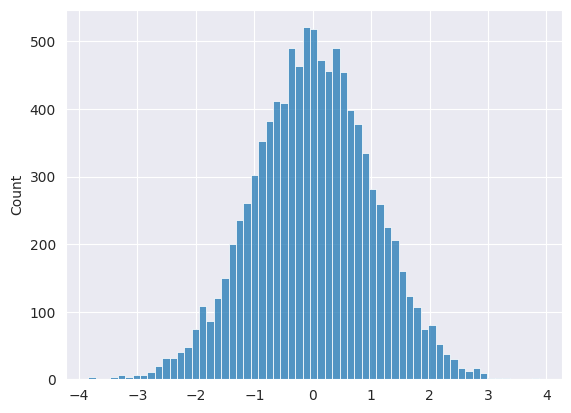

In [135]:
sns.histplot(z_score)

### Рассчитаем T значение


*   z score мы считаем зная среднее в генеральной совокупности
*   t score мы считаем опираясь на se (ошибку выборочных средних)


при выборке примерно больше 30 z и t распределения получаются примерно одинаковыми



In [136]:
n = 10000
t_scores = []
for _ in range(n):
  sample = np.random.choice(population, sample_size, replace=False)
  sample_mean = sample.mean()
  sample_std = sample.std()

  se_ = sample_std / np.sqrt(sample_size)

  t_score = (sample_mean - mu) / se_
  t_scores.append(t_score)

<Axes: ylabel='Count'>

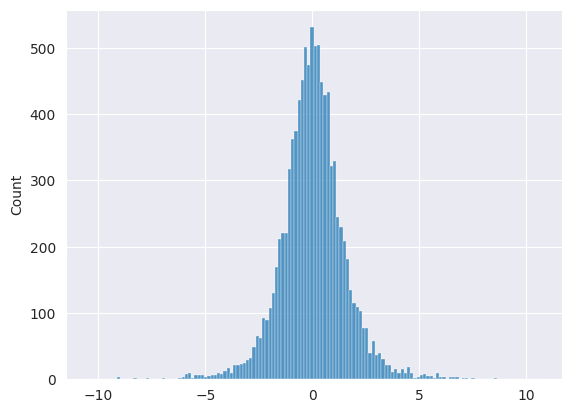

In [137]:
sns.histplot(t_scores)

Нам нужно делать поправку меньшую точность, потому что мы расчитываем сигму через выборочные среднее.

Это поправка называется число степеней свободы (df - degree of freedoom) и равняется **объему(числу сэмплов) в нашей выборке - 1**

In [138]:
df = sample_size - 1

и теперь расширив наш доверительный интервал мы можем посчитать его.

In [139]:
sample_real = np.random.choice(population, sample_size, replace=False)

In [140]:
print(sample_real.mean() - 2.093 * se, sample_real.mean() + 2.093 * se, sep='\n\n')

90.37181944618588

109.09218055381412


### Обычная выборка

In [80]:
n = 10000
result = [np.random.choice(population, sample_size, replace=False).mean() for _ in range(n)]

<Axes: ylabel='Count'>

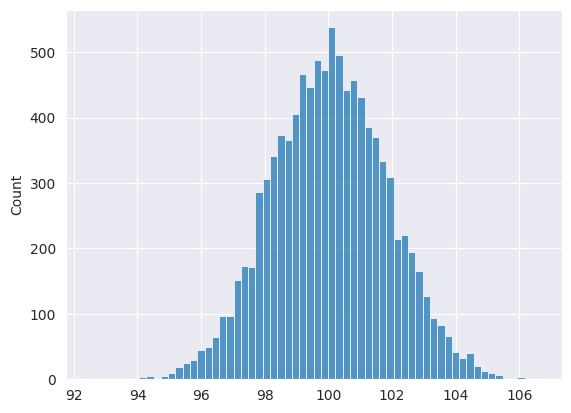

In [81]:
sns.set_style('darkgrid')
sns.histplot(result)

In [82]:
np.mean(result)

100.032748

Правило 1.96 сигм - 95% наблюдений лежит в этом диапозоне

Правило 3 сигм - 100% наблюдений лежит в этом диапозоне

$$se = {sigma \over \sqrt{n}}$$

In [83]:
se = population.std() / np.sqrt(sample_size)
se

1.8175753004147768

In [84]:
np.std(result)

1.8160577972099654

In [85]:
population.mean() + 1.96 * se

103.58433958881297

In [86]:
population.mean() - 1.96 * se

96.45944441118705

В реальности мы не можем себе позволить:


1.   Одна выборка.
2.   Не знаем про генеральную совокупность ни среднего, ни стандартного отклонения.



In [87]:
sample_real = np.random.choice(population, sample_size, replace=False)

In [88]:
sample_real

array([ 80.13,  84.89, 114.16,  87.8 , 101.65,  94.5 ,  88.66,  99.18,
       107.31,  97.31, 107.43, 110.05,  91.47, 102.75, 118.  ,  99.72,
       120.57, 116.41,  79.02, 105.97, 108.71, 103.32, 101.49, 114.01,
       112.19,  92.33, 103.26,  95.76, 101.38, 105.57])

In [89]:
sample_real.mean()

101.50000000000003

In [90]:
sample_real.std()

10.663109302637764

Мы можем подставить вместо сигмы выборочное стандартное отклонение sd

$$se = {sd \over \sqrt{n}}$$

In [91]:
se = sample_real.std() / np.sqrt(sample_size)
se

1.946808499399295

In [92]:
print(sample_real.mean() - 1.96 * se, sample_real.mean() + 1.96 * se, sep='\n\n')

97.6842553411774

105.31574465882265


(упрощенно) с 95% вероятностью реальное среднее значение лежит в нашем доверительном интервале.

### Задача

Предположим, некоторый признак распределен нормально в ГС. Мы сформировали выборку из 25 наблюдений.

M = 18.4

s = 4

Проверим гипотезу, о том что среднее в ГС равняется 20 при помощи t - теста и z - критерия(а = 0.05)

$$t = {x̄ - μ \over \sqrt {s^2 \over n}}$$

$$t = {18.4 - 20 \over \sqrt {16 \over 25}} = -2$$


$$z = {x̄ - μ \over \sqrt {σ^2 \over n}} = 2$$

$$t = -2$$
$$df = 24$$


$$P(X < -2 or X > 2) = 0.0569$$

На основании t - теста мы сможем сохранить нулевую гипотезу.